In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Step 1: Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 2: Preprocess Data
# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the 28x28 images into 1D vectors (input_dim = 784)
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Dropout Model

In [9]:
# Step 3: Build Neural Network with Dropout
dropout_model = Sequential([
    Dense(512, activation='relu', input_dim=784),  # First dense layer
    Dropout(0.5),  # Drop 50% of neurons
    Dense(256, activation='relu'),  # Second dense layer
    Dropout(0.3),  # Drop 30% of neurons
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile the model
dropout_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 4: Train the Model
history_with_dropout = dropout_model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=20,
    batch_size=128,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7917 - loss: 0.6591 - val_accuracy: 0.9592 - val_loss: 0.1346
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9462 - loss: 0.1787 - val_accuracy: 0.9685 - val_loss: 0.1030
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9596 - loss: 0.1326 - val_accuracy: 0.9728 - val_loss: 0.0917
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9643 - loss: 0.1117 - val_accuracy: 0.9750 - val_loss: 0.0834
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9712 - loss: 0.0922 - val_accuracy: 0.9743 - val_loss: 0.0832
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9740 - loss: 0.0840 - val_accuracy: 0.9758 - val_loss: 0.0818
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9762 - loss: 0.0765 - val_accuracy: 0.9758 - val_loss: 0.0811
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9791 - loss: 0.0662 - val_a

In [11]:
# Step 5: Evaluate the Model
test_loss, test_accuracy = dropout_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.0626, Test Accuracy: 0.9832


## Without Dropout

In [12]:
# Step 3: Build Neural Network with Dropout
without_dropout_model = Sequential([
    Dense(512, activation='relu', input_dim=784),  # First dense layer
    Dropout(0.5),  # Drop 50% of neurons
    Dense(256, activation='relu'),  # Second dense layer
    Dropout(0.3),  # Drop 30% of neurons
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile the model
without_dropout_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Step 4: Train the Model
history_no_dropout = without_dropout_model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=20,
    batch_size=128,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7882 - loss: 0.6713 - val_accuracy: 0.9563 - val_loss: 0.1464
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9456 - loss: 0.1845 - val_accuracy: 0.9683 - val_loss: 0.1062
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9580 - loss: 0.1360 - val_accuracy: 0.9703 - val_loss: 0.1001
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9655 - loss: 0.1088 - val_accuracy: 0.9737 - val_loss: 0.0856
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9693 - loss: 0.0992 - val_accuracy: 0.9740 - val_loss: 0.0862
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9728 - loss: 0.0858 - val_accuracy: 0.9768 - val_loss: 0.0764
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9758 - loss: 0.0789 - val_accuracy: 0.9765 - val_loss: 0.0808
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9762 - loss: 0.0750 - val

In [14]:
# Step 5: Evaluate the Model
test_loss, test_accuracy = without_dropout_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.0639, Test Accuracy: 0.9836


## Compare Results

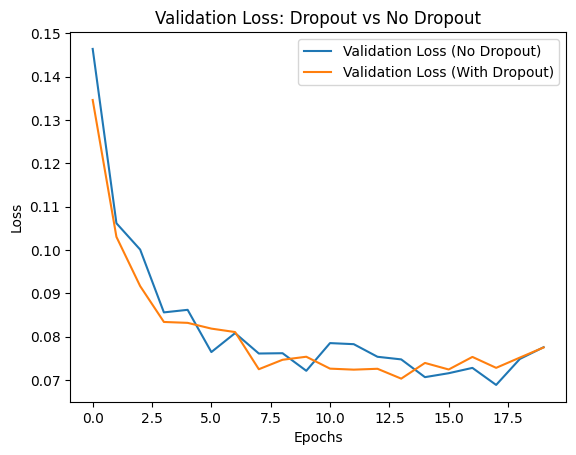

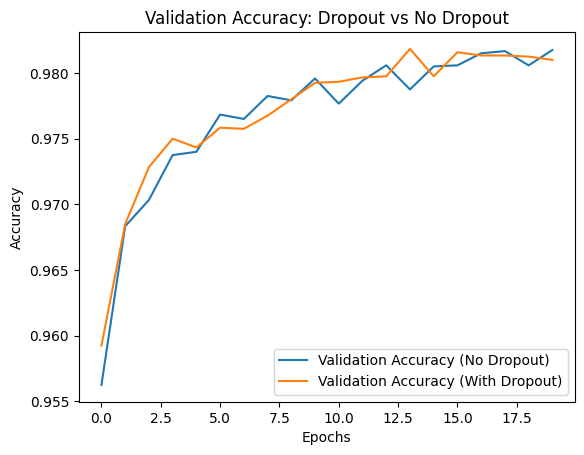

In [15]:
import matplotlib.pyplot as plt

# Plot Training vs Validation Loss
plt.plot(history_no_dropout.history['val_loss'], label='Validation Loss (No Dropout)')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss (With Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Validation Loss: Dropout vs No Dropout')
plt.show()

# Plot Training vs Validation Accuracy
plt.plot(history_no_dropout.history['val_accuracy'], label='Validation Accuracy (No Dropout)')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy (With Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy: Dropout vs No Dropout')
plt.show()